In [20]:
# Transformers installation
! pip install transformers 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Zero-shot object detection

In [21]:
from transformers import pipeline

checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Next, choose an image you'd like to detect objects in. Here we'll use the image of astronaut Eileen Collins that is
a part of the [NASA](https://www.nasa.gov/multimedia/imagegallery/index.html) Great Images dataset.

In [22]:
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

In [23]:
import skimage
import numpy as np
from PIL import Image

Get the link from the google and past hare 

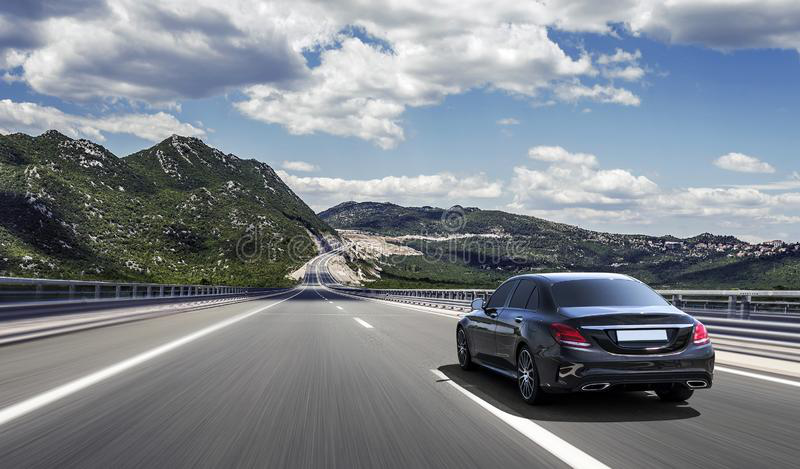

In [24]:
import requests

# url="https://i.ytimg.com/vi/ELlqqgKEy8M/maxresdefault.jpg"
# url="https://c.files.bbci.co.uk/15A39/production/_128433688_m1tank.jpg"
url="https://thumbs.dreamstime.com/b/car-drives-fast-highway-highlands-black-148886931.jpg"
im = Image.open(requests.get(url, stream=True).raw)
im

In [25]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

In [26]:
text_queries = ["car", "bus", "truck", "tank"]
inputs = processor(text=text_queries, images=im, return_tensors="pt")

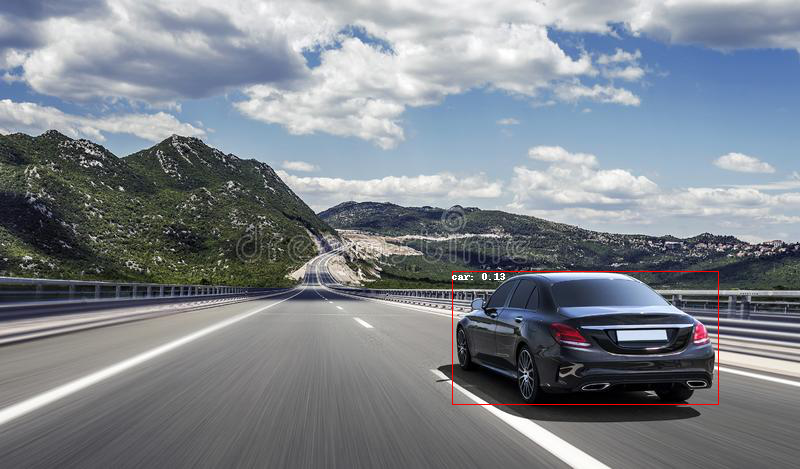

In [27]:
import torch

with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([im.size[::-1]])
    results = processor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]

draw = ImageDraw.Draw(im)

scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}: {round(score,2)}", fill="white")

im